

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs. 

In [56]:
#
# Import Libraries
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
%matplotlib inline
import matplotlib.pyplot as plt

## Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [58]:
# Your code to read data
df = pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)
df.head()

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [59]:
# Set name of column as 'Sales'. Use - df.columns 
df.columns = ['Sales']

df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Plot your data - Year vs Sales

<AxesSubplot:xlabel='DATE'>

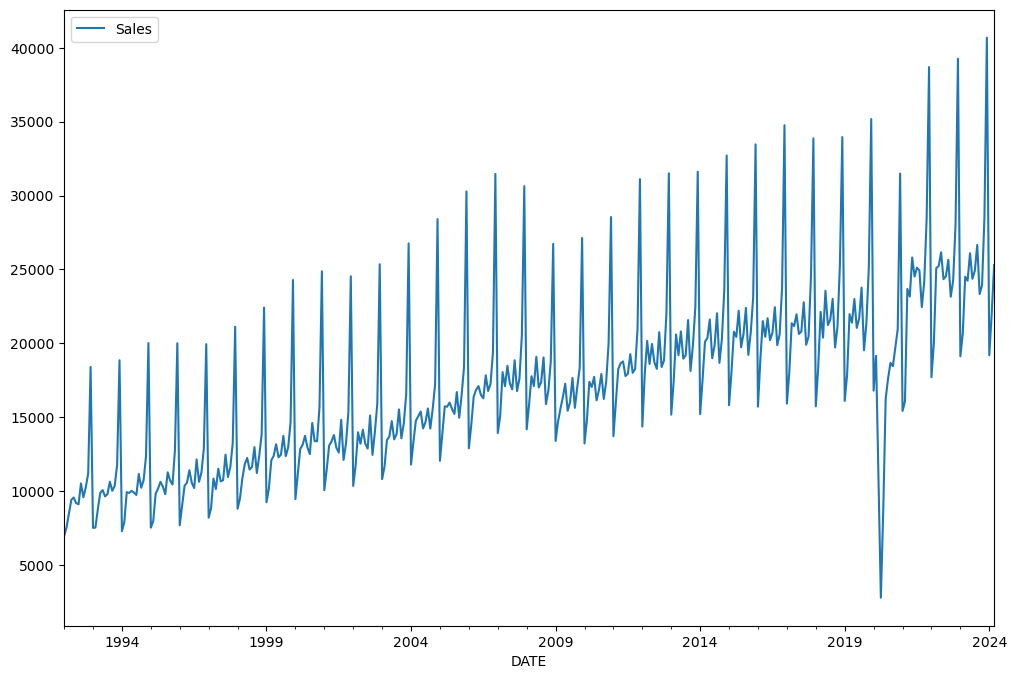

In [60]:
# Your code to plot Year vs Sales. Use either matplot library of pandas dataframe.
df.plot(figsize=(12,8))

### Next we will do Train Test Split. 

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [62]:
# Assign variable test size = 18
# Store length of data in variable length.
# store training size in varialable train_size (Remember training size = total size - test_size)
test_size = 18
length = len(df)
train_size = length - test_size
data_length = len(df)
data_length

387

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

In [63]:
#Assign the start of test index in data frame to variable test_index.  Remember, it is equal to the length of dataframe - test size
len(df)- 18
train_size = data_length- test_size
train_size

369

Next, we will separate train and test datasets.

In [64]:
# Store all data from 0 to test_index in variable train. Hint - Use df.iloc.
# Store everthing from test_index to the last sample in test variable. Hint - Use df.iloc.
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [68]:
# Print the size of the train data
# Print the size of the test data
print("Size of train data:", len(train))

# Print the size of the test data
print("Size of test data:", len(test))

Size of train data: 369
Size of test data: 18


### In Neural Networks, we need to Scale Data between 0-1

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [71]:
#
# Check if the data has been scaled properly
#

print("Summary statistics of train data:")
print(train.describe())


print("\nSummary statistics of test data:")
print(test.describe())

Summary statistics of train data:
              Sales
count    369.000000
mean   16851.978320
std     5748.514495
min     2776.000000
25%    12461.000000
50%    16386.000000
75%    20252.000000
max    38697.000000

Summary statistics of test data:
              Sales
count     18.000000
mean   25837.722222
std     5765.130342
min    19118.000000
25%    23482.250000
50%    24437.000000
75%    26516.750000
max    40684.000000


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [72]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [73]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11586537 0.13217895 0.15865371 0.1844325  0.18880321 0.17833579
 0.17613652 0.21538933 0.18922079 0.20817906 0.23415272 0.43481529]
Predict this y: 
 [[0.13156649]]


### Create the Model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

In [75]:
# We're only using one feature in our time series
n_features = 1

# Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [76]:
# 
# Your code to create your own model
#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    return model

# Define input shape based on the number of features in your data
input_shape = (10, 1)  # Example input shape, adjust based on your data

# Create the LSTM model
lstm_model = create_lstm_model(input_shape)

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 50)            10400     
                                                                 
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [79]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Now, fit your model.

In [81]:
# Your code to fit your model.
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=1)

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
EarlyStopping?

In [84]:
# create an object early-stop.

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [85]:
# fit model
# IGNORE THE WARNING

history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
357/357 [==============================] - 6s 11ms/step - loss: 0.0618 - val_loss: 0.1128
Epoch 2/30
357/357 [==============================] - 3s 9ms/step - loss: 0.0367 - val_loss: 0.1072
Epoch 3/30
357/357 [==============================] - 3s 10ms/step - loss: 0.0316 - val_loss: 0.1007
Epoch 4/30
357/357 [==============================] - 4s 11ms/step - loss: 0.0285 - val_loss: 0.0904
Epoch 5/30
357/357 [==============================] - 5s 13ms/step - loss: 0.0258 - val_loss: 0.0812
Epoch 6/30
357/357 [==============================] - 5s 13ms/step - loss: 0.0246 - val_loss: 0.0834
Epoch 7/30
357/357 [==============================] - 5s 13ms/step - loss: 0.0238 - val_loss: 0.0801
Epoch 8/30
357/357 [==============================] - 5s 14ms/step - loss: 0.0224 - val_loss: 0.0723
Epoch 9/30
357/357 [==============================] - 4s 12ms/step - loss: 0.0216 - val_loss: 0.0658
Epoch 10/30
357/357 [==============================] - 5s 13ms/step - loss: 0.0213 - val_los

In [86]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
losses = pd.DataFrame(model.history.history)

## Evaluate on Test Data

In [87]:
first_eval_batch = scaled_train[-length:]

In [89]:
first_eval_batch

array([[[0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412],
        [0.56724479]]])

In [90]:
# compare with the true result:
scaled_test[0]

array([0.59761699])

#### Try predicting the series!

In [92]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412],
        [0.56724479]]])

## Inverse Transformations and Compare

In [148]:
scaler.inverse_transform?

In [ ]:
# IGNORE WARNINGS
# Assuming test_X is already defined
# Make predictions using the trained model
test_predictions = lstm_model.predict(test_X)
# Inverse transform the predictions to the original scale
true_predictions = scaler.inverse_transform(test_predictions)
# Assign the true predictions to the 'Predictions' column in the test dataframe
test['Predictions'] = true_predictions

# Check and plot predictions

In [102]:
# Print the test variable.
test

,Sales
DATE,
2022-10-01,24243.0
2022-11-01,28045.0
2022-12-01,39263.0
2023-01-01,19118.0
2023-02-01,20666.0
2023-03-01,24510.0
2023-04-01,24232.0
2023-05-01,26096.0
2023-06-01,24364.0


<AxesSubplot:xlabel='DATE'>

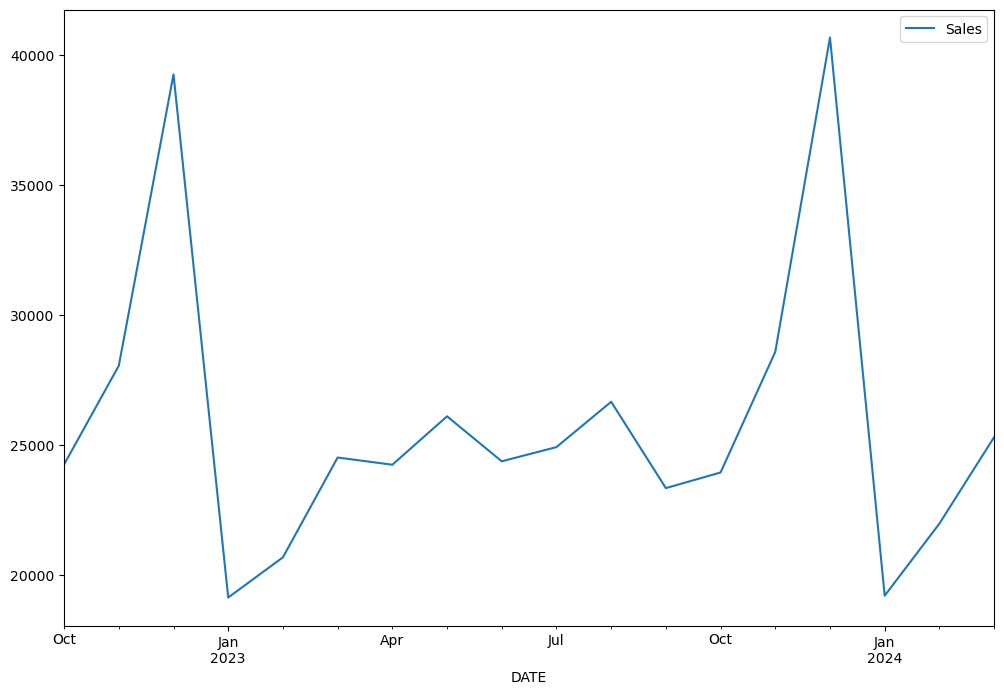

In [103]:
# Your code to plot actual sales and predictions.
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [108]:
#
# Use any neural network model based on RNN
#
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Create the model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(10, 1)))  # 50 units, input shape (10, 1)
model.add(Dense(1))  # Output layer with 1 neuron

In [110]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [113]:
# use early_stop
early_stop = EarlyStopping(monitor='loss',patience=5)

In [114]:
# fit the model
history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
357/357 [==============================] - 3s 4ms/step - loss: 0.0111
Epoch 2/30
357/357 [==============================] - 1s 4ms/step - loss: 0.0067
Epoch 3/30
357/357 [==============================] - 2s 4ms/step - loss: 0.0065
Epoch 4/30
357/357 [==============================] - 2s 4ms/step - loss: 0.0068
Epoch 5/30
357/357 [==============================] - 2s 5ms/step - loss: 0.0064
Epoch 6/30
357/357 [==============================] - 2s 6ms/step - loss: 0.0059
Epoch 7/30
357/357 [==============================] - 2s 6ms/step - loss: 0.0065
Epoch 8/30
357/357 [==============================] - 2s 7ms/step - loss: 0.0068
Epoch 9/30
357/357 [==============================] - 2s 6ms/step - loss: 0.0061
Epoch 10/30
357/357 [==============================] - 2s 5ms/step - loss: 0.0060
Epoch 11/30
357/357 [==============================] - 2s 6ms/step - loss: 0.0058
Epoch 12/30
357/357 [==============================] - 2s 7ms/step - loss: 0.0060
Epoch 13/30
357/357 [====

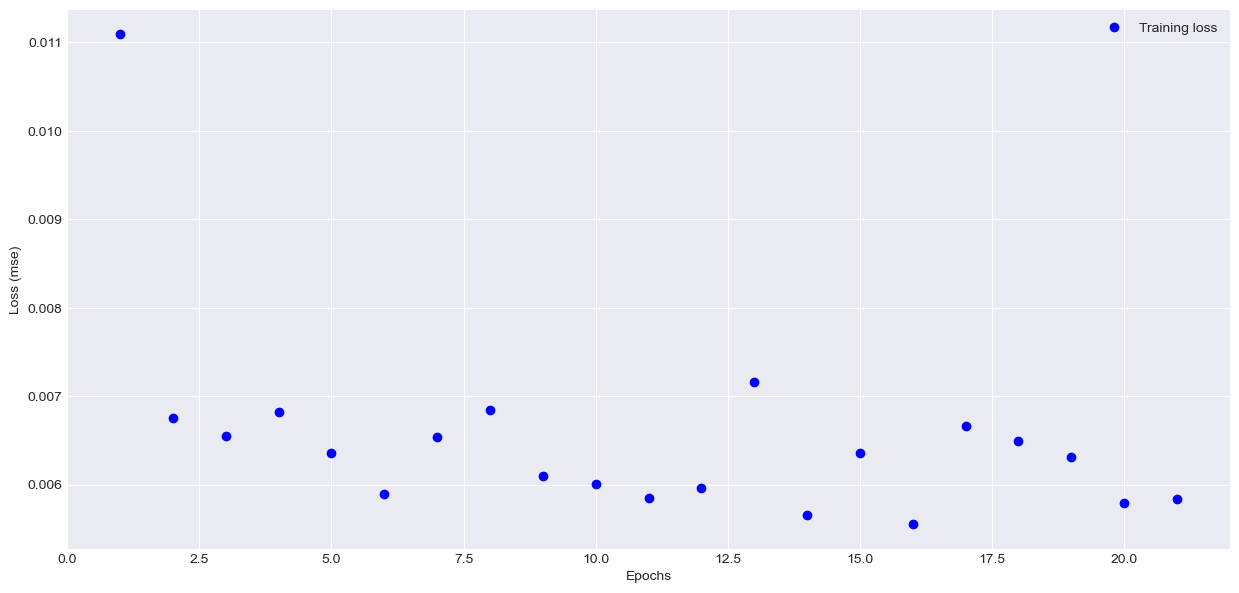

In [145]:
forecast = []
# Replace periods with whatever forecast length you want
history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

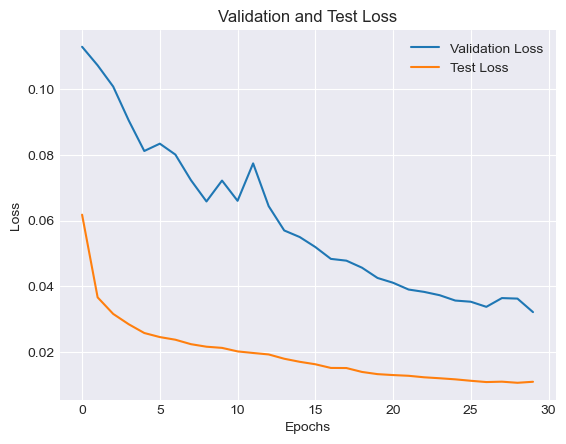

In [146]:
import matplotlib.pyplot as plt

# Plot validation and test loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation and Test Loss')
plt.legend()
plt.savefig('validation_test_loss_plot.png')  # Save the plot as an image
plt.show()

In [121]:
# Assuming `data` is your actual dataset
model.fit(generator,epochs=8)

Epoch 1/8
357/357 [==============================] - 1s 4ms/step - loss: 0.0061
Epoch 2/8
357/357 [==============================] - 1s 4ms/step - loss: 0.0059
Epoch 3/8
357/357 [==============================] - 1s 4ms/step - loss: 0.0065
Epoch 4/8
357/357 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 5/8
357/357 [==============================] - 2s 4ms/step - loss: 0.0060
Epoch 6/8
357/357 [==============================] - 1s 4ms/step - loss: 0.0056
Epoch 7/8
357/357 [==============================] - 2s 4ms/step - loss: 0.0065
Epoch 8/8
357/357 [==============================] - 2s 4ms/step - loss: 0.0059


### Creating new timestamp index with pandas.

In [122]:
df

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-11-01,28580.0
2023-12-01,40684.0
2024-01-01,19188.0


In [123]:
forecast_index = pd.date_range(start='2024-01-01',periods=periods,freq='MS')

In [124]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [125]:
forecast_df

,Forecast
2024-01-01,NaN
2024-02-01,NaN
2024-03-01,NaN
2024-04-01,NaN
2024-05-01,NaN
2024-06-01,NaN
2024-07-01,NaN
2024-08-01,NaN
2024-09-01,NaN
2024-10-01,NaN


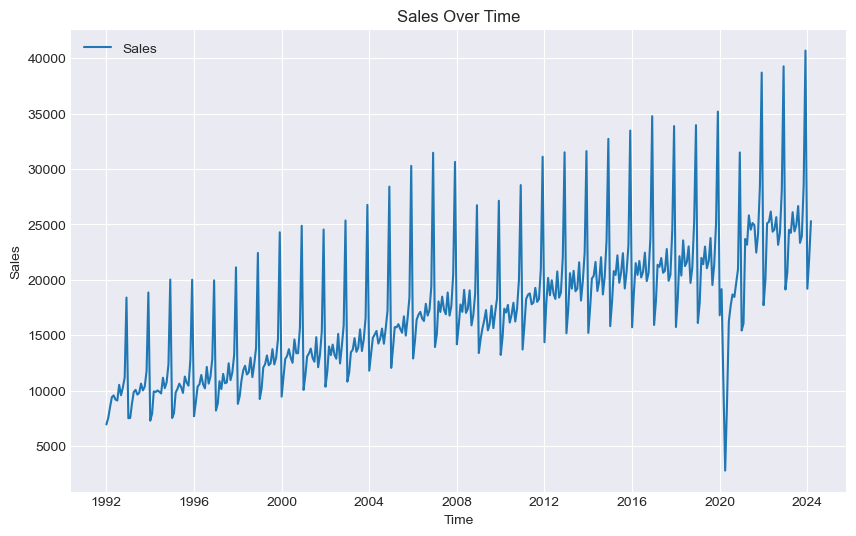

In [126]:
# Plot sales - Values in dataframe
import matplotlib.pyplot as plt

# Plot sales values
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()

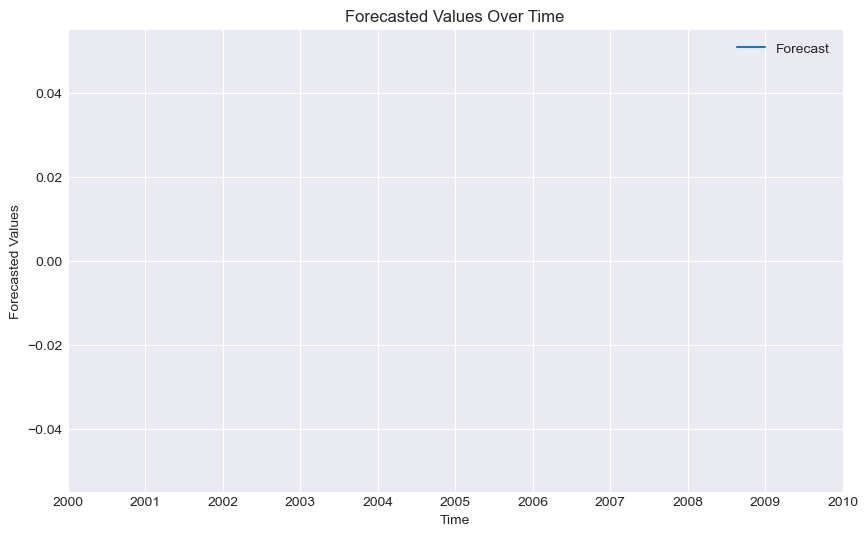

In [127]:
# Plot forecast - Values in forecast_df
import matplotlib.pyplot as plt

# Plot forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.xlabel('Time')
plt.ylabel('Forecasted Values')
plt.title('Forecasted Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<AxesSubplot:xlabel='DATE'>

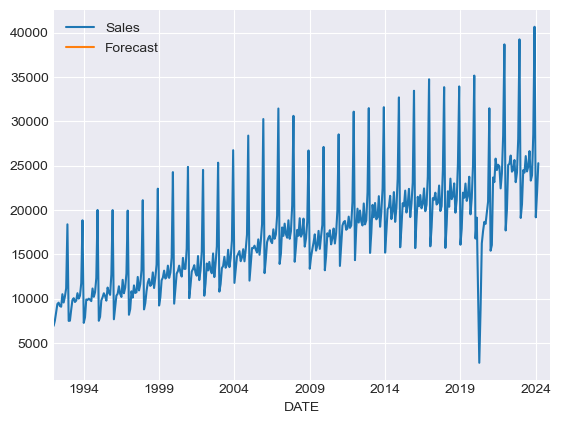

In [128]:
ax = df.plot()
forecast_df.plot(ax=ax)

(624.0, 660.0)

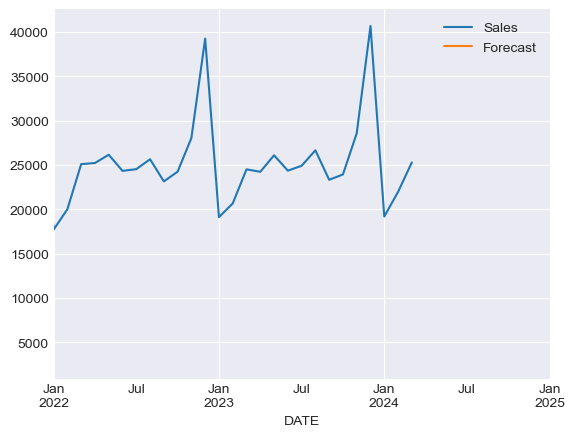

In [129]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2022-01-01','2025-01-01')

# Try the same example with a LSTM and GRU! 
Hint: Use LSTM instead of SimpleRNN!

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
import tensorflow as tf
# We're only using one feature in our time series
n_features = 1
# define model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
Total params: 40,800
Trainable params: 40,800
Non-trainable params: 0
_________________________________________________________________
